# Load Packages

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
import torch.nn.functional as F
import copy

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Loading Datset

In [2]:
batch_size=1000
epochs = 10


transforms=transforms.Compose([transforms.ToTensor()])
train_set = dataset.MNIST(root='./data',train=True, 
                           download=True,transform=transforms)
train_loader = DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True,num_workers=4)
test_set = dataset.MNIST(root='/data', train=False,
                        download=True, transform=transforms)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size,num_workers=4)
type(dataset)

# Simple Autoencoders

In [3]:
class autoencoder(nn.Module):
    def  __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28,100),
                                    nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(100,28*28),
                                    nn.ReLU())
        
    def forward(self,x):
        x =self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
net = autoencoder()
init_weights = copy.deepcopy(net.encoder[0].weight.data)

In [5]:
init_weights

tensor([[ 0.0110,  0.0119,  0.0078,  ...,  0.0072,  0.0085,  0.0206],
        [ 0.0317, -0.0019, -0.0054,  ...,  0.0092,  0.0193, -0.0260],
        [ 0.0083, -0.0298,  0.0060,  ...,  0.0152,  0.0056, -0.0300],
        ...,
        [ 0.0142,  0.0026, -0.0244,  ..., -0.0074,  0.0168,  0.0330],
        [ 0.0032,  0.0018,  0.0228,  ..., -0.0224, -0.0109, -0.0067],
        [ 0.0041,  0.0031, -0.0329,  ..., -0.0213, -0.0207,  0.0147]])

# optimization technique

In [6]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.5, momentum=0.9)


In [7]:
dataiter=iter(train_loader)
image,_=dataiter.next()
image.view(image.size(0),-1).shape

torch.Size([1000, 784])

In [8]:
for epoch in range(epochs):
    running_loss = 0
    for data in (train_loader):
        image,_=data
        inputs = image.view(image.size(0),-1)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    print('At Iteration : %d   ;  Mean-Squared Error : %f'%(epoch + 1,running_loss/
                                                                (train_set.train_data.size(0)/batch_size)))
print('Finished Training')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


At Iteration : 1   ;  Mean-Squared Error : 0.079368
At Iteration : 2   ;  Mean-Squared Error : 0.057577
At Iteration : 3   ;  Mean-Squared Error : 0.044280
At Iteration : 4   ;  Mean-Squared Error : 0.036593
At Iteration : 5   ;  Mean-Squared Error : 0.031615
At Iteration : 6   ;  Mean-Squared Error : 0.028534
At Iteration : 7   ;  Mean-Squared Error : 0.026323
At Iteration : 8   ;  Mean-Squared Error : 0.024634
At Iteration : 9   ;  Mean-Squared Error : 0.023337
At Iteration : 10   ;  Mean-Squared Error : 0.022131
Finished Training


In [9]:
dataiter=iter(test_loader)
test_image,_=dataiter.next()
input_image = test_image.view(image.size(0),-1)
test_image= test_image.view(-1,28,28)

In [10]:
test_image.shape

torch.Size([1000, 28, 28])

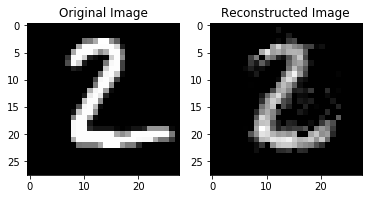

In [11]:
output_image = net(input_image)
output_image=output_image.view(-1,28,28)
fig = plt.figure()
plot=fig.add_subplot(1,2,1)
img = np.array(test_image[1])
plot.set_title('Original Image')
imgplot = plt.imshow(img,cmap='gray')

plot=fig.add_subplot(1,2,2)
img = output_image.data
plot.set_title('Reconstructed Image')
imgplot = plt.imshow(img[1].numpy(),cmap='gray')
plt.show()

# Visualizing the weights

In [12]:
trained_weights = copy.deepcopy(net.encoder[0].weight.data)

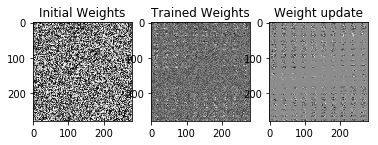

In [31]:
init_weights = (1+init_weights)*127.5
trained_weights = (1+trained_weights)*127.5


trained_weights = trained_weights.view(-1,280,280)
init_weights = init_weights.view(-1,280,280)
d_weights = init_weights - trained_weights 

fig = plt.figure()
plot=fig.add_subplot(1,3,1)
img = np.array(init_weights.numpy())[0]
plot.set_title('Initial Weights')
imgplot = plt.imshow(img,cmap='gray')

plot=fig.add_subplot(1,3,2)
img = np.array(trained_weights.numpy())[0]
plot.set_title('Trained Weights')
imgplot = plt.imshow(img,cmap='gray')

plot=fig.add_subplot(1,3,3)
img = np.array(d_weights.numpy())[0]
plot.set_title('Weight update')

imgplot = plt.imshow(img,cmap='gray')
plt.show()